# Finanças Básicas / Matemática Financeira

1) Interest, Present and Future Value
2) Cash Flows: NPV and IRR  
3) Pagamentos periódicos e Amortização
4) Weighted Avarage Cost of Capital (WACC)      

In [1]:
# imports
import numpy_financial as npf

import numpy as np
import scipy 
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt

## 1) Interests (Juros) + plotagem

$A = P * (1 + r)^n $    
$FV = PV * (1 + r)^n $

A taxa de juros $r$ e a quantidade de períodos $n$ devem ter a mesma frequência (ex.: r é a taxa anual e n a quantidade de anos)

In [2]:
# exemplo de investimentos diferentes 

P = 100

# taxa de 10% aplicado em 5 anos
r1 = .1
n1 = 5
A1 = P*(1+r1)**n1

# taxa de 7% aplicado em 8 anos
r2 = .07
n2 = 8
A2 = P*(1+r2)**n2

# taxa de 5% aplicado em 12 anos
r3 = .05
n3 = 12
A3 = P*(1+r3)**n3

print(A1, A2, A3)

161.05100000000004 171.8186179831921 179.585632602213


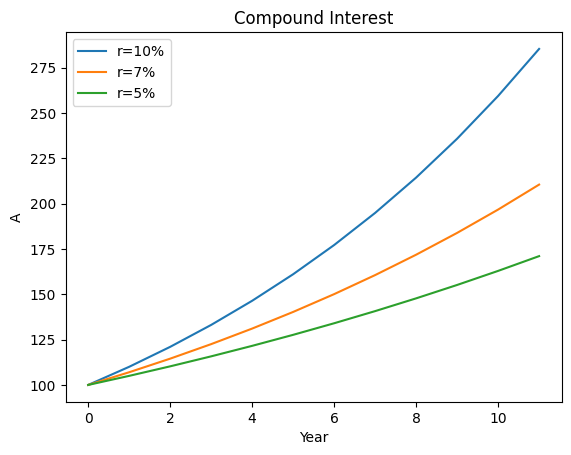

In [3]:
def compoundInterest(p, r, n):
    A = p*(1+r)**n
    return A

years = list(range(12))
A1 = [compoundInterest(P, r1, i) for i in years]
A2 = [compoundInterest(P, r2, i) for i in years]
A3 = [compoundInterest(P, r3, i) for i in years]

plt.plot(years,A1,label="r=10%")
plt.plot(years,A2,label="r=7%")
plt.plot(years,A3,label="r=5%")
plt.xlabel("Year")
plt.ylabel("A")
plt.title("Compound Interest")
plt.legend()
plt.show()

## 2) Cash Flows: NPV and IRR 
### Cash Flow

Um fluxo de caixa é uma coluna (lista ou array) caracterizado por entradas e saídas     
Cada entrada e saída em um período t diferente;     
Tudo já aplicado tem efeito do juros e da inflação

### Net Present Value (NPV)
https://www.investopedia.com/terms/n/npv.asp
   
Net Present Value é o valor total do fluxo de caixa do investimento no valor presente, ou seja, descontando a inflação (ou outras taxas periódicas)    


In [4]:
### EXEMPLO
# Inflação: 6% (ano)
# Investimento 1: Há um investimento inicial no primeiro período, e pretende-se retirar valores iguais nos períodos conseguintes
# Investimento 2: Há um investimento inicial no primeiro período, e retira-se um valor final fixo 

# OBS.: neste exemplo, este é o fluxo de caixa DA PESSOA (ou da empresa). +: entra dinheiro no bolso, -: sai dinheiro do bolso; portanto se o NPV é positivo => negócio é lucrativo

inv1 = [-60, 12, 12, 12, 12, 12, 12] # em 6 períodos, o valor total vai para 72
inv2 = [-60, 0, 0, 0, 0, 0, 72]
inflacao = .04

# método só com numpy: array com 1/(1+inflacao) acumulados e multiplica pelo array dos investimentos

inflacao_acum_inv = [1/(1+inflacao)**i for i in list(range(7))]; print(inflacao_acum_inv)

npv1 = np.array(inv1) * np.array(inflacao_acum_inv); print(npv1)
npv2 = np.array(inv2) * np.array(inflacao_acum_inv); print(npv2)

print(np.sum(npv1))
print(np.sum(npv2))

# npf - npv
npv11 = npf.npv(inflacao, inv1); print(npv11)
npv22 = npf.npv(inflacao, inv2); print(npv22)

[1.0, 0.9615384615384615, 0.9245562130177514, 0.8889963586709149, 0.8548041910297257, 0.8219271067593517, 0.7903145257301457]
[-60.          11.53846154  11.09467456  10.6679563   10.25765029
   9.86312528   9.48377431]
[-60.           0.           0.           0.           0.
   0.          56.90264585]
2.9056422809562026
-3.097354147429506
2.9056422809562097
-3.097354147429506


In [5]:
# Note que: se eu aplicar a menos o valor NPV dado anteriormente para o mesmo retorno final, então o investimento é nulo (protege da inflação); igualmente se eu manter o investimento inicial esperando retirar no último período o valor do juros igual à inflação -- isso vale exclusivamente pra investimentos sem entradas ou saídas em períodos intermediários

juros_inf = 60*(1+inflacao)**6
juros_inf

75.91914110976002

Aqui, focamos no NPV com o desconto inflacionário e considerando simplesmente se vale (NPV>0) ou não (NPV<0) investir pelo valor corrosivo da moeda.  
Mas se considerarmos, além da inflação, os juros (DO INVESTIMENTO), mesmo sabendo que poderá ser positivo, o NPV serve pra saber o quanto se está ganhando A MAIS no valor presente.

In [6]:
# Exemplo: Investimento X ou SELIC?

infl = .04
selic = .11

inv = [-1000, 200, 200, 200, 200, 200, 200] # 2024 a 2030
juros = .09

npv = npf.npv(
    +infl
    -juros # ATENCAO AO DESCONTO
    , inv); print(npv) 

tesouro = 1000*(1
                +selic
                -infl
                )**6; print(tesouro-1000)

441.49656799922644
500.7303518490005


Regrinhas simples pra NPV: 
* fluxo de caixa é PESSOAL / da EMPRESA
* Investimento inicial em t=0 é NEGATIVO (sai dindin do seu bolso pra ir pro investimento)
* O desconto é computado POSITIVAMENTE (se houver juros > inflação => o valor ficará negativo)
* O valor final NPV é o LUCRO do investimento

### Internal Rate of Return (IRR) 

https://www.investopedia.com/terms/i/irr.asp

Antes tínhamos o fluxo de caixa dado e a inflação/juros dados, e calculávamos o valor presente para saber o Lucro.
Agora, ainda com o fluxo de caixa dado, calculamos o retorno do investimento de tal forma que o Lucro seja 0.

Se antes o desconto (inflação) era positivo e queríamos NPV (Lucro) positivo, agora teremos IRR positivo 

$ 0=NPV=∑^T_{t=1} \frac{C_t}{(1+{IRR})^t} - C_0 $

In [15]:
# Calculando IRR e comparando com NPV

inv1 = [-100, 50, 50, 50, 50, 50, 50]
inv2 = [-100, 0, 0, 0, 0, 0, 300]
inflacao = .04

irr1 = npf.irr(inv1); print(irr1)
npv1 = npf.npv(inflacao, inv1); print(npv1)

irr2 = npf.irr(inv2); print(irr2)
npv2 = npf.npv(inflacao, inv2); print(npv2)

0.4450983210916324
162.10684283731754
0.20093695517600296
137.0943577190437


Perceba que o IRR não leva em conta juros ou inflação, apenas o próprio fluxo de caixa. Portanto, a depender do investimento, é necessário ter um fluxo com juros e inflação já aplicados.

## 3) Pagamentos periódicos e Amortização

### Pagamentos periódicos / Anuidades

Até agora, consideramos que os fluxos de caixa eram investimentos específicos, dados (investimento > fluxo). Agora, vamos usar o fluxo de caixa de forma mais abrangente para resolver problemas específicos (questão > fluxo > investimento). Claro que no mundo os investimentos sempre são "dados previamente", mas com tantas escolhas, faz sentido ter um "plano" antes de escolher.

A adição aqui está nos "pagamentos": entradas OU retiradas contínuas de valores fixos de um investimento que continuam rendendo ao longo do tempo. - quando o valor varia, é mais fácil calcular separado, como outro fluxo de caixa

In [8]:
# Exemplo: quero me aposentar com 50 anos e pretendo morrer com 80; quero retirar R$ 5000 por mês, e acredito que a taxa de juros da economia (média do meu investimento) nesse período se manterá em torno de 6% (ao ano), inflação em 2% (ao ano).

n = 30*12
pgto = 5000
tx = 0.003274 #tem que acumular e passar de ano pra mês

npf.pv(tx, n, -pgto)

1056368.5388434834

### Amortização

Usada quando se quer pagar uma dívida (os juros são usado contra você)

https://www.serasa.com.br/limpa-nome-online/blog/amortizacao-entenda-como-funciona-e-os-principais-tipos/

O juros é sempre aplicado em cima do SALDO (e não da PRESTAÇÃO).

Na __Tabela SAC__, o saldo é dividido pelos períodos e se pagam cada prestação + juros. Como o saldo diminui ao se pagar as prestações, os juros também diminuem com o tempo.

Na __Tabela Price__, o v


## 4) Weighted Average Cost of Capital (WACC)

O Weighted Average Cost of Capital (WACC), em português Custo Médio Ponderado de Capital, é um percentual que tem como objetivo expressar o risco operacional de uma empresa. Se uma empresa precisa de investimento, ela irá precisar captar recursos, seja de fontes internas (acionistas) ou fontes externas (banco), o WACC representa se a taxa mínima de retorno é aceitável para o investimento.

**WACC = Ke * (E/(D+E)) + Kd * (D/(D+E)) * (1-IR)**

- E = capital próprio - patrimônio líquido da empresa

- D = capital de terceiros - dívida total

- Ke = custo de capital próprio

- Kd = custo de capital de terceiros

- IR = imposto de renda

- E/(D+E) = proporção do capital correspondente ao patrimônio líquido

- D/(D+E) = proporção do capital correspondente à dívida

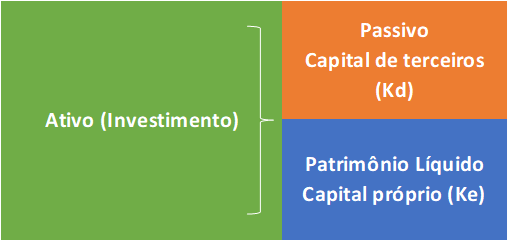

Exemplo:

- Uma empresa está desenvolvendo um projeto cujo custo total será de R$ 5 milhões. Para financiar esse projeto, os acionistas entrarão com R$ 3 milhões, e os R$ 2 milhões restantes serão financiados por bancos.

- Para emprestar esse dinheiro, o banco cobrará uma taxa de 3% ao ano. Por outro lado, os acionistas querem obter um retorno de 5% ao ano sobre os recursos que aportaram na empresa.

In [10]:
# Resolução

# - IR pode ser desconsiderado na questão.
Ke = 0.05 # ao ano
E = 3000000
Kd = 0.03 # ao ano
D = 2000000

We = Ke * E # Custo do capital que os sócios emprestaram
Wd = Kd * D # Custo do financiamento do banco
WAAC = (We + Wd) / (D + E)

print(f"O WAAC é {WAAC}.")

O WAAC é 0.042.


Interpretação:

Basicamente, investidores e analistas de projetos utilizam o WACC por dois motivos principais: para identificar o custo médio de capital e para estabelecer a taxa mínima de retorno que se quer sobre o investimento.

Em linhas gerais, podemos considerar o WACC como a taxa mínima aceitável que o investidor deve ter de retorno em uma empresa, ou que ela própria deve ter em um projeto que desenvolve. Imagine que o WACC de uma empresa é de 15% e que apresente retornos de 20%. Isso significa dizer que, para cada real investido, o retorno é de 5%.